
#**Experiment Case 2: 3D Printing Roughness Prediction Model.**  
Original owner and performed by - Kaustubh Yewale     





  

Feel free to reach me!  
GitHub link: https://github.com/Kaustubh5352  
LinkedIn link: https://www.linkedin.com/in/kaustubh-yewale23/

# Roughness predicting model using Linear Regression of the 3D printing dataset.

**1. Importing the Dataset**

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#To enable matplot visualization
%matplotlib inline

In [ ]:
#Importing the Dataset using .read_csv() function of pandas
#We will call the dataset as 'printer'
df_pr = pd.read_csv("/content/drive/MyDrive/DAL Practical/Practical 2/3D Printer Dataset - 3D Printer Dataset.csv")


In [ ]:
#Let's check few rows of the dataset using the .head() function of pandas
df_pr.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,grid,220,60,40,abs,0,25,18,1.2
1,0.02,7,90,honeycomb,225,65,40,abs,25,32,16,1.4
2,0.02,1,80,grid,230,70,40,abs,50,40,8,0.8
3,0.02,4,70,honeycomb,240,75,40,abs,75,68,10,0.5
4,0.02,6,90,grid,250,80,40,abs,100,92,5,0.7


In [ ]:
# Basic information of the dataset using .info() function of pandas
df_pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   layer_height        50 non-null     float64
 1   wall_thickness      50 non-null     int64  
 2   infill_density      50 non-null     int64  
 3   infill_pattern      50 non-null     object 
 4   nozzle_temperature  50 non-null     int64  
 5   bed_temperature     50 non-null     int64  
 6   print_speed         50 non-null     int64  
 7   material            50 non-null     object 
 8   fan_speed           50 non-null     int64  
 9   roughness           50 non-null     int64  
 10  tension_strenght    50 non-null     int64  
 11  elongation          50 non-null     float64
dtypes: float64(2), int64(8), object(2)
memory usage: 4.8+ KB


**2. Data Visualization**

In [ ]:
df_pr['infill_pattern'].replace(['grid', 'honeycomb'], [0,1], inplace = True)
df_pr['material'].replace(['abs', 'pla'], [0,1], inplace = True)

<ipython-input-6-818d6b1e7a75>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_pr['infill_pattern'].replace(['grid', 'honeycomb'], [0,1], inplace = True)
<ipython-input-6-818d6b1e7a75>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_pr['infill_pattern'].replace(['grid', 'honeycomb'], [0,1], 

In [ ]:
#let's view the first 10 observations
df_pr.head (10)

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,roughness,tension_strenght,elongation
0,0.02,8,90,0,220,60,40,0,0,25,18,1.2
1,0.02,7,90,1,225,65,40,0,25,32,16,1.4
2,0.02,1,80,0,230,70,40,0,50,40,8,0.8
3,0.02,4,70,1,240,75,40,0,75,68,10,0.5
4,0.02,6,90,0,250,80,40,0,100,92,5,0.7
5,0.02,10,40,1,200,60,40,1,0,60,24,1.1
6,0.02,5,10,0,205,65,40,1,25,55,12,1.3
7,0.02,10,10,1,210,70,40,1,50,21,14,1.5
8,0.02,9,70,0,215,75,40,1,75,24,27,1.4
9,0.02,8,40,1,220,80,40,1,100,30,25,1.7


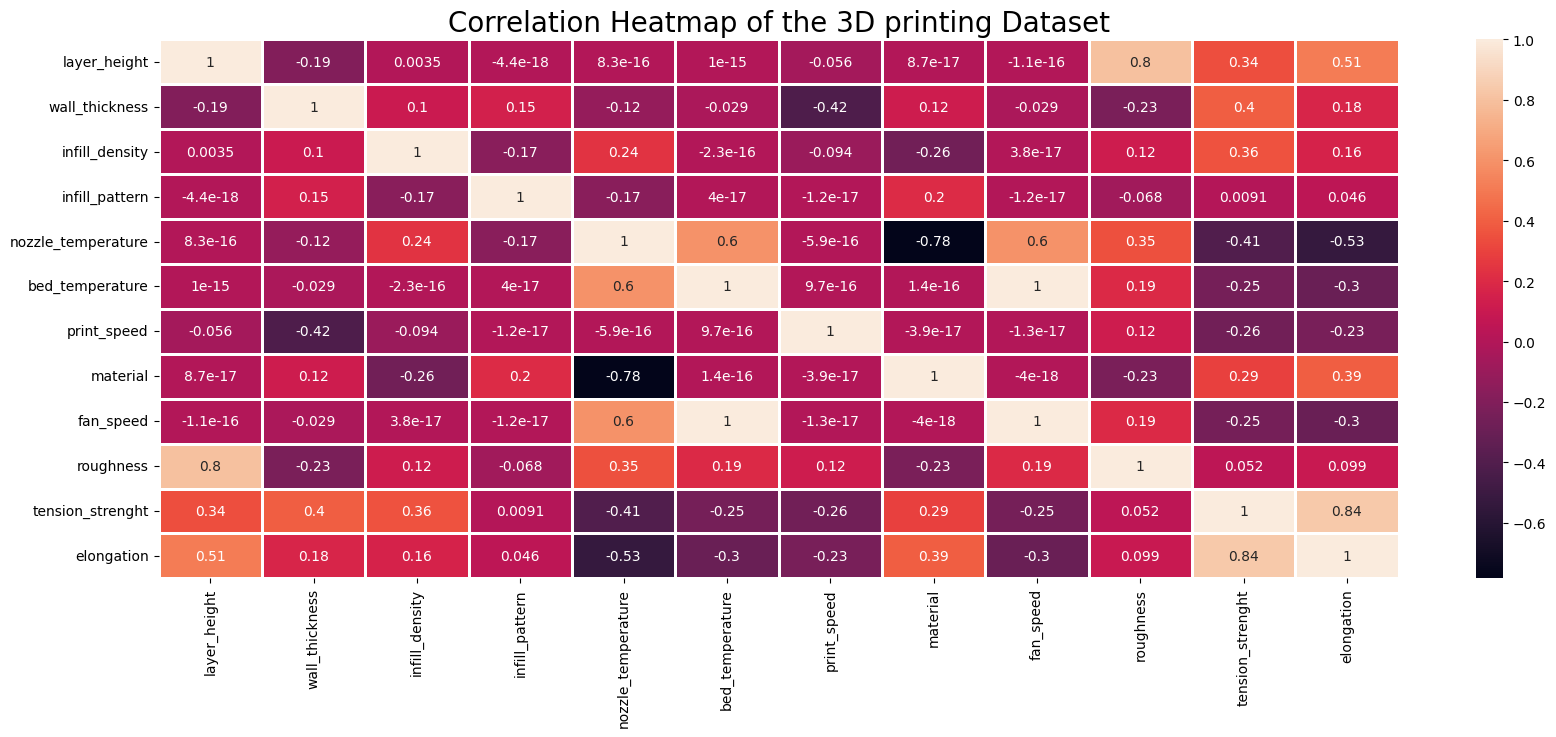

In [ ]:
# Creating the heatmap
# First create a space for the heatmap and then draw the heatmap inside the space
fig, ax = plt.subplots(figsize =(20,7))

#Title for the heatmap
title = 'Correlation Heatmap of the 3D printing Dataset'
plt.title(title, fontsize = 20)
ttl= ax.title

# Correlation heatmap using .heatmap() function of sns library
sns.heatmap(df_pr.corr(), cbar = True, cmap = 'rocket', annot = True, linewidths = 1, ax = ax)

#enable visualization using .show() function of matplot
plt.show()


**Inference from Heatmap:**   
1) Roughness is correlated to layer height meaning as layer height (feature) increases, roughness increases as well.   
2) Material is negatively correlated with nozzle temperarure. So, if nozzle temperature increases, the material quality dimnishes.   
3) Bed temperature is correlated with nozzle temperature. As nozzle temperature increases, bed temperature increases.   
4) Fan speed is positively correlated with nozzle temperature as well.   
5) Fan speed is full positively correlated (1) with bed temperature.   
6) The labels elongation and tension strength are positively correlated as well.   

**Model 1: Predicting roughness based on 9 features.**

In [ ]:
# Defining features and labels
X = df_pr.drop(['roughness', 'tension_strenght', 'elongation'], axis = 1)
y = df_pr['roughness']
X.head()


,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [ ]:
#importing statsmodels library
import statsmodels.api as sm


In [ ]:
# let's define a function for the multiple regression
def linear_Regression(x,y):
  X = sm.add_constant(x)
  #defining the model, fitting the model and printing the results
  multiple_model = sm.OLS (y, x).fit()
  print (multiple_model.summary())

In [ ]:
#calling the linear regression function
linear_Regression (X,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     35.95
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           3.83e-16
Time:                        03:52:41   Log-Likelihood:                -248.19
No. Observations:                  50   AIC:                             514.4
Df Residuals:                      41   BIC:                             531.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
layer_height        1269.4449     87

**Inference from model :-**   
1) The R-squared value is 0.875 ot 87.5% which states that about 87.5% of proportion of variability in data can be explained by this linear regression model. The r-squared is the most important parameter for a model evaluation. higher the value, better is the fit.   
2) The p-value is an important measure for evaluating the various variables. Closer is the p-value to 1, the lesser is that feature variable has to do with the label variable. In our model, wall thickness, infill_density and infill_pattern are all close to 1 meaning they don't play much role in roughness.   
3) Finally, the expression for this model can be written from the coefficients as follows
Roughness = -0.9534 +1269.4449layer_height +2.3342wall thickness - 0.0423infill_density-0.1255infill_pattern +
15.0562nozzle_temperature - 55.6225bbed_temperature + 0.6496print_speed + 298.4514material +7.8989*fan_speed .


In [ ]:
#check X
X.head()

,layer_height,wall_thickness,infill_density,infill_pattern,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,8,90,0,220,60,40,0,0
1,0.02,7,90,1,225,65,40,0,25
2,0.02,1,80,0,230,70,40,0,50
3,0.02,4,70,1,240,75,40,0,75
4,0.02,6,90,0,250,80,40,0,100


In [ ]:
X = X.drop(['wall_thickness','infill_density', 'infill_pattern'], axis = 1)
X.head()

,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,220,60,40,0,0
1,0.02,225,65,40,0,25
2,0.02,230,70,40,0,50
3,0.02,240,75,40,0,75
4,0.02,250,80,40,0,100


In [ ]:
#calling the linear regression function
linear_Regression (X,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     59.78
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.67e-18
Time:                        03:52:41   Log-Likelihood:                -248.88
No. Observations:                  50   AIC:                             509.8
Df Residuals:                      44   BIC:                             521.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
layer_height        1246.5353     83

**Inference**   
1) The R-squared value decreases to 87.2% which is not much decrease.   
2) The p-values of all the considered features do play an important role in predicting the label.   
3) We can improve the model further by considering interaction terms based on the correlation heatmap.

In [ ]:
X.head()

,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed
0,0.02,220,60,40,0,0
1,0.02,225,65,40,0,25
2,0.02,230,70,40,0,50
3,0.02,240,75,40,0,75
4,0.02,250,80,40,0,100


In [ ]:
#get the interaction terms by multiplying values
inter_mn = X['material']*X['nozzle_temperature']
inter_bn = X['bed_temperature' ]*X[ 'nozzle_temperature']
inter_fn = X['fan_speed']*X['nozzle_temperature']
inter_fb = X['fan_speed']*X[ 'bed_temperature']


In [ ]:
#adding these interaction terms to dataset using .concat() function of pandas
#we will call this dataset as interaction

In [ ]:
interaction = pd.concat([X, inter_mn, inter_bn, inter_fn,inter_fb], axis = 1)

In [ ]:
#chenge column names of this interaction terms
interaction = interaction. rename (columns ={0: 'interct_mn', 1:'interact_bn', 2:'interact_fn',3:'interact_fb'})

In [ ]:
interaction.head (10)

,layer_height,nozzle_temperature,bed_temperature,print_speed,material,fan_speed,interct_mn,interact_bn,interact_fn,interact_fb
0,0.02,220,60,40,0,0,0,13200,0,0
1,0.02,225,65,40,0,25,0,14625,5625,1625
2,0.02,230,70,40,0,50,0,16100,11500,3500
3,0.02,240,75,40,0,75,0,18000,18000,5625
4,0.02,250,80,40,0,100,0,20000,25000,8000
5,0.02,200,60,40,1,0,200,12000,0,0
6,0.02,205,65,40,1,25,205,13325,5125,1625
7,0.02,210,70,40,1,50,210,14700,10500,3500
8,0.02,215,75,40,1,75,215,16125,16125,5625
9,0.02,220,80,40,1,100,220,17600,22000,8000


In [ ]:
# NOw let's fit this model to the linear regression function
linear_Regression(interaction,y)

                            OLS Regression Results                            
Dep. Variable:              roughness   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                     63.22
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           1.31e-20
Time:                        03:52:41   Log-Likelihood:                -235.45
No. Observations:                  50   AIC:                             488.9
Df Residuals:                      41   BIC:                             506.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
layer_height        1246.5353     65

**Conclusion:-**  
1) Multiple Linear Regressions model was developed, achieving an R-Square value of 92.5%, accurately predicting roughness based on 3D printing.  
2) Layer height and material type, were the most influential factors in determining surface roughness.

